In [23]:
import pandas as pd

In [24]:
df = pd.read_csv("matches_results.csv")

In [25]:
df.head()

,Unnamed: 0,matchId,team1,team2,bestOf,t1wins,t2wins,overtimes,team1pastMatchesWon,team2pastMatchesWon,result
0,0,2331080,MIBR,Astralis,Best of 3,21,28,8,4,4,0
1,1,2331079,Natus Vincere,ENCE,Best of 3,2,1,0,4,4,0
2,2,2331078,Astralis,NiP,Best of 3,14,9,2,4,3,1
3,3,2331077,MIBR,Renegades,Best of 3,8,2,1,4,4,1
4,4,2331076,Liquid,ENCE,Best of 3,0,0,0,5,3,0


In [26]:
df = df.drop(columns = ["Unnamed: 0"])

In [27]:
df.sort_values(by=['matchId']).tail()

,matchId,team1,team2,bestOf,t1wins,t2wins,overtimes,team1pastMatchesWon,team2pastMatchesWon,result
105,2331372,PACT,Codewise Unicorns,Best of 3,0,0,0,3,2,1
104,2331385,SJ,PACT,Best of 3,1,2,0,4,4,0
99,2331386,Windigo,pro100,Best of 3,6,2,3,4,1,1
103,2331387,Hator.CZ,MAJESTY,Best of 3,0,1,0,0,3,0
101,2331389,Paradox,freedomfighters,Best of 3,0,0,0,3,0,1


In [28]:
#df.sort_values("matchId").describe()

In [29]:
df2 = df[df.bestOf == "Best of 1"]

In [30]:
df3 = df[df.bestOf == "Best of 3"]

In [31]:
df2 = df2.append(df3)

In [32]:
df2.sort_values("matchId").tail()

,matchId,team1,team2,bestOf,t1wins,t2wins,overtimes,team1pastMatchesWon,team2pastMatchesWon,result
105,2331372,PACT,Codewise Unicorns,Best of 3,0,0,0,3,2,1
104,2331385,SJ,PACT,Best of 3,1,2,0,4,4,0
99,2331386,Windigo,pro100,Best of 3,6,2,3,4,1,1
103,2331387,Hator.CZ,MAJESTY,Best of 3,0,1,0,0,3,0
101,2331389,Paradox,freedomfighters,Best of 3,0,0,0,3,0,1


In [33]:
#t1 = pd.get_dummies(df2["team1"], prefix = "team1", drop_first = True)
#t2 = pd.get_dummies(df2["team2"], prefix = "team2", drop_first = True)
#bestOf = pd.get_dummies(df2["bestOf"], drop_first = True)

In [34]:
df2 = pd.concat([df2.drop('team1', axis=1),pd.get_dummies(df2["team1"], prefix = "team1", drop_first = True)], axis=1)
df2 = pd.concat([df2.drop('team2', axis=1),pd.get_dummies(df2["team2"], prefix = "team2", drop_first = True)], axis=1)
df3 = pd.concat([df2.drop('bestOf', axis=1),pd.get_dummies(df2["bestOf"], prefix = "bestOf", drop_first = True)], axis=1)

In [35]:
#df2.drop("team1", inplace = True, axis = 1)
#df2.drop("team2", inplace = True, axis = 1)
#df2.drop("bestOf", inplace = True, axis = 1)

#df3 = pd.concat([df2, t1, t2, bestOf], axis = 1)

In [36]:
df3.sort_values("matchId").tail()

,matchId,t1wins,t2wins,overtimes,team1pastMatchesWon,team2pastMatchesWon,result,team1_AGO,team1_AVANGAR,team1_AZIO,...,team2_fnatic Academy,team2_forZe,team2_freedomfighters,team2_iNTACT,team2_lmfao,team2_mousesports,team2_pro100,team2_x-kom,team2_x6tence Galaxy,bestOf_Best of 3
105,2331372,0,0,0,3,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
104,2331385,1,2,0,4,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
99,2331386,6,2,3,4,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
103,2331387,0,1,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
101,2331389,0,0,0,3,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [37]:
df3 = df3.sort_values("matchId")

df3 = df3.drop(columns = ["matchId"])

In [38]:
from sklearn.model_selection import train_test_split
%matplotlib inline

In [39]:
y = df3.result
x = df3.drop(columns='result', axis = 1)

xTrain, xTest, yTrain, yTest = train_test_split(x, y, shuffle=False)

len(xTrain), len(xTest)

(782, 261)

In [40]:
from sklearn.ensemble  import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [54]:
reg = RandomForestClassifier(n_estimators=120)
reg.fit(xTrain, yTrain)
yPred = reg.predict(xTest)

accuracy_score(yTest, yPred)

0.6206896551724138

In [42]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(xTrain, yTrain)
yPred = clf.predict(xTest)

accuracy_score(yTest, yPred)

0.5440613026819924

In [43]:
import xgboost as xgb
#model = xgb.XGBClassifier()
model = xgb.XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=5,
                        min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,
                        objective='binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
#model.fit(xTrain, yTrain, eval_metric='auc')
# make predictions for test data
#yPred = model.predict(xTest)
#predictions = [round(value) for value in yPred]
# evaluate predictions
#accuracy = accuracy_score(yTest, predictions)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [64]:
reg.predict_proba(xTest)[-20:]

array([[0.70833333, 0.29166667],
       [0.55833333, 0.44166667],
       [0.71666667, 0.28333333],
       [0.45      , 0.55      ],
       [0.63333333, 0.36666667],
       [0.33333333, 0.66666667],
       [0.8       , 0.2       ],
       [0.325     , 0.675     ],
       [0.31666667, 0.68333333],
       [0.53333333, 0.46666667],
       [0.575     , 0.425     ],
       [0.55833333, 0.44166667],
       [0.55      , 0.45      ],
       [0.55833333, 0.44166667],
       [0.525     , 0.475     ],
       [0.64166667, 0.35833333],
       [0.43333333, 0.56666667],
       [0.475     , 0.525     ],
       [0.5       , 0.5       ],
       [0.63333333, 0.36666667]])

In [59]:
xTest.tail(20)

,t1wins,t2wins,overtimes,team1pastMatchesWon,team2pastMatchesWon,team1_AGO,team1_AVANGAR,team1_AZIO,team1_Astralis,team1_BIG,...,team2_fnatic Academy,team2_forZe,team2_freedomfighters,team2_iNTACT,team2_lmfao,team2_mousesports,team2_pro100,team2_x-kom,team2_x6tence Galaxy,bestOf_Best of 3
9,0,4,1,3,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,5,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100,0,0,0,2,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15,4,2,0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,0,0,0,3,2,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13,0,0,0,5,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,2,0,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,0,0,0,2,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [58]:
yTest.tail(20)

9      0
102    1
100    0
15     1
17     1
13     1
11     0
5      1
16     0
14     1
12     0
10     1
8      0
7      1
98     0
105    1
104    0
99     1
103    0
101    1
Name: result, dtype: int64

In [65]:
df3.tail(20)

,t1wins,t2wins,overtimes,team1pastMatchesWon,team2pastMatchesWon,result,team1_AGO,team1_AVANGAR,team1_AZIO,team1_Astralis,...,team2_fnatic Academy,team2_forZe,team2_freedomfighters,team2_iNTACT,team2_lmfao,team2_mousesports,team2_pro100,team2_x-kom,team2_x6tence Galaxy,bestOf_Best of 3
9,0,4,1,3,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,5,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
100,0,0,0,2,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
15,4,2,0,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17,0,0,0,3,2,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13,0,0,0,5,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,1,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,2,0,5,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,0,0,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
14,0,0,0,2,4,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F0F68D9B0>,
      dtype=object)

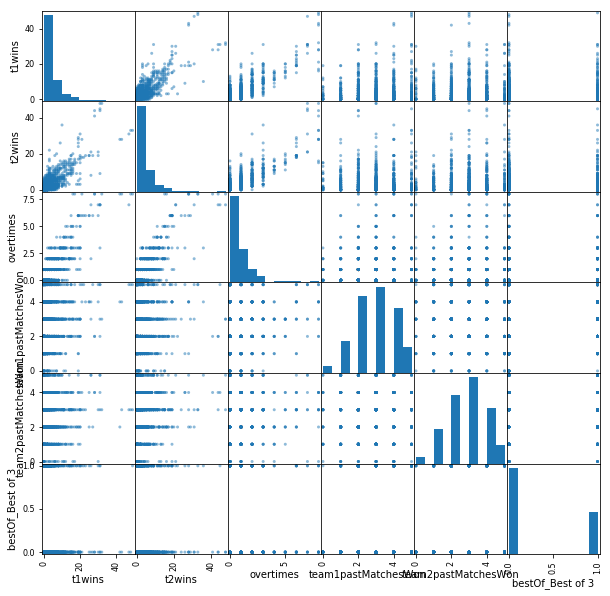

In [67]:
from pandas.plotting import scatter_matrix

scatter_matrix(df3[["t1wins","t2wins", "overtimes", "team1pastMatchesWon", "team2pastMatchesWon", "bestOf_Best of 3"]], figsize=(10, 10))

In [70]:
reg.feature_importances_

array([0.09701665, 0.09341133, 0.04484478, 0.07544287, 0.07051842,
       0.00846474, 0.00165352, 0.00077192, 0.01703658, 0.00836273,
       0.        , 0.        , 0.0007203 , 0.00113448, 0.0001839 ,
       0.00731114, 0.00151166, 0.00783167, 0.0005869 , 0.00036881,
       0.00188406, 0.        , 0.01032011, 0.00182383, 0.0098973 ,
       0.00059318, 0.00156873, 0.0066468 , 0.0003059 , 0.00029134,
       0.        , 0.00762154, 0.00747081, 0.00163886, 0.00253711,
       0.        , 0.        , 0.00678336, 0.00779435, 0.01150336,
       0.00666186, 0.00924238, 0.00039141, 0.01161883, 0.01108973,
       0.01010433, 0.01069046, 0.00964859, 0.00080176, 0.0004153 ,
       0.        , 0.00047296, 0.00500079, 0.00251123, 0.00039443,
       0.00109781, 0.        , 0.00039072, 0.00461214, 0.00048352,
       0.00142954, 0.00147721, 0.00078248, 0.00560785, 0.00074301,
       0.00062514, 0.        , 0.0043878 , 0.        , 0.00774231,
       0.        , 0.        , 0.00063752, 0.00513858, 0.00096

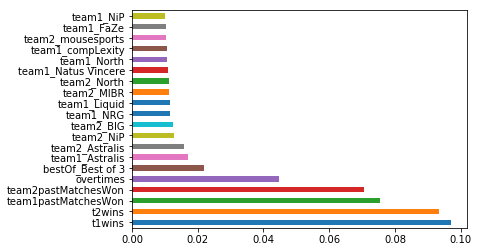

In [72]:
feat_importances = pd.Series(reg.feature_importances_, index=xTrain.columns)
feat_importances.nlargest(20).plot(kind='barh')